## 3 - Linear Regression 

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

### Let's create a dataset to fit our linear regression model

In [12]:
X, Y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=8.0, random_state=100)

#### Let's add a column for the intercept

In [13]:
X = np.concatenate((X, np.ones(shape=(200, 1))), axis=1)

Text(0, 0.5, 'y')

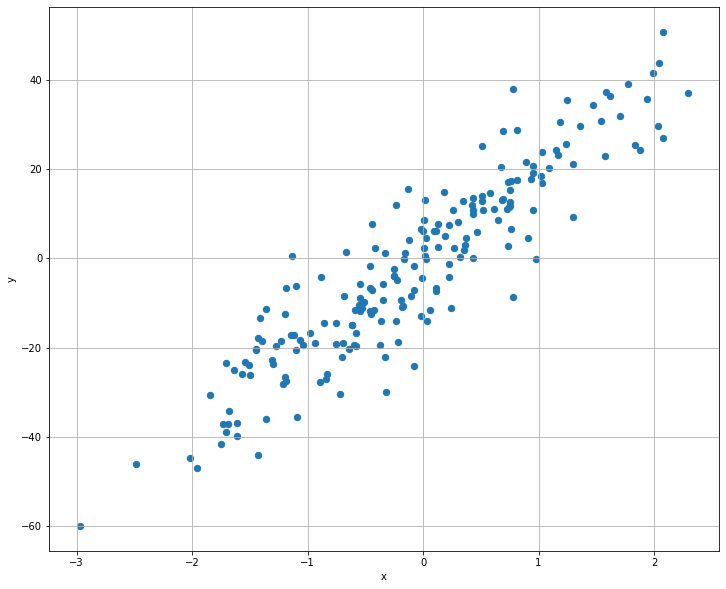

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(X[:, 0], Y[:], s=40)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

### Let's compute the parameters using the formula

In [15]:
theta = np.linalg.inv(X.T @ X) @ X.T @ Y

In [16]:
theta

array([18.78077464, -0.35314218])

### The equation is: y = theta[0]x + theta[1]

In [17]:
x0 = -3
x1 = 2

y0 = theta[0] * x0 + theta[1]
y1 = theta[0] * x1 + theta[1]

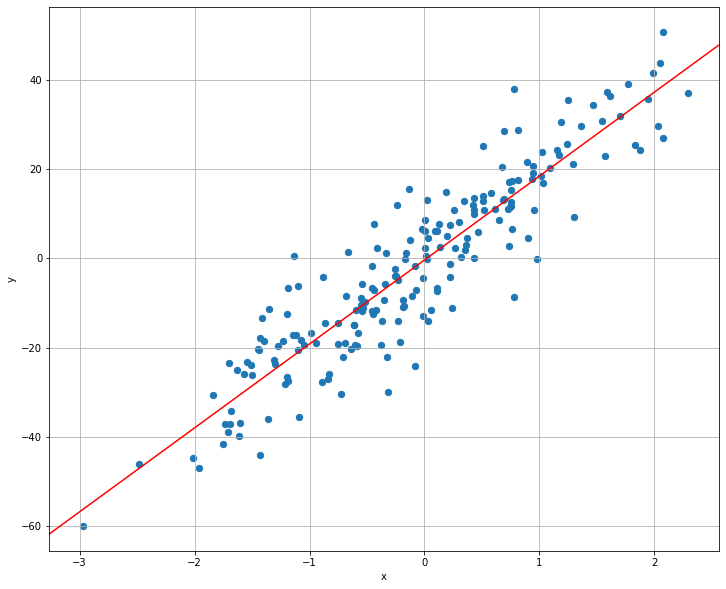

In [18]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(X[:, 0], Y[:], s=40)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axline((x0, y0), (x1, y1), c='red')

### Let's train a Linear Regression model

In [19]:
lr = LinearRegression()

In [20]:
lr.fit(X, Y)

LinearRegression()

In [21]:
lr.coef_

array([18.78077464,  0.        ])

In [22]:
lr.intercept_

-0.35314218271934994

In [23]:
x0r = -3
x1r = 2

y0r = lr.coef_[0] * x0 + lr.intercept_
y1r = lr.coef_[0] * x1 + lr.intercept_

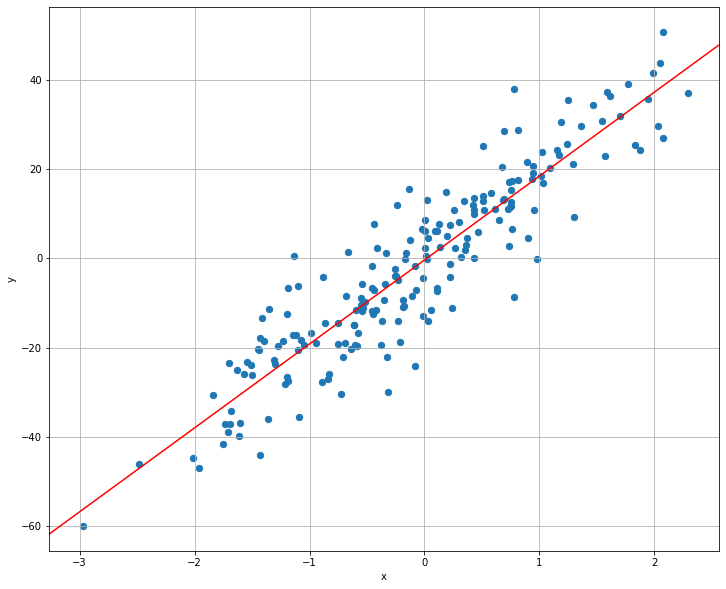

In [24]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(X[:, 0], Y[:], s=40)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axline((x0r, y0r), (x1r, y1r), c='red')

### Let's compute the coefficient of determination R^2

In [25]:
lr.score(X, Y)

0.8422724910506572

In [26]:
ar2 = 1 - (199 / 198) * (1 - lr.score(X, Y))

In [27]:
ar2

0.8414758874701049

### Let's use statsmodels to compute confidence intervals

In [28]:
import pandas as pd
import statsmodels.formula.api as smf

In [29]:
X, Y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=8.0, random_state=100)

In [31]:
data = np.concatenate((X, np.expand_dims(Y, 1)), axis=1)
df = pd.DataFrame(data, columns=('x', 'y'))

In [32]:
slr = smf.ols('y ~ x', data=df)

In [33]:
r = slr.fit()

In [34]:
print(r.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1057.
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           2.41e-81
Time:                        17:40:09   Log-Likelihood:                -706.43
No. Observations:                 200   AIC:                             1417.
Df Residuals:                     198   BIC:                             1423.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3531      0.590     -0.598      0.5

### Let's now simulate the presence of outliers

In [35]:
X, Y = make_regression(n_samples=200, n_features=1, n_informative=1, noise=8.0, random_state=100)

In [36]:
Y[180:] += 100

Text(0, 0.5, 'y')

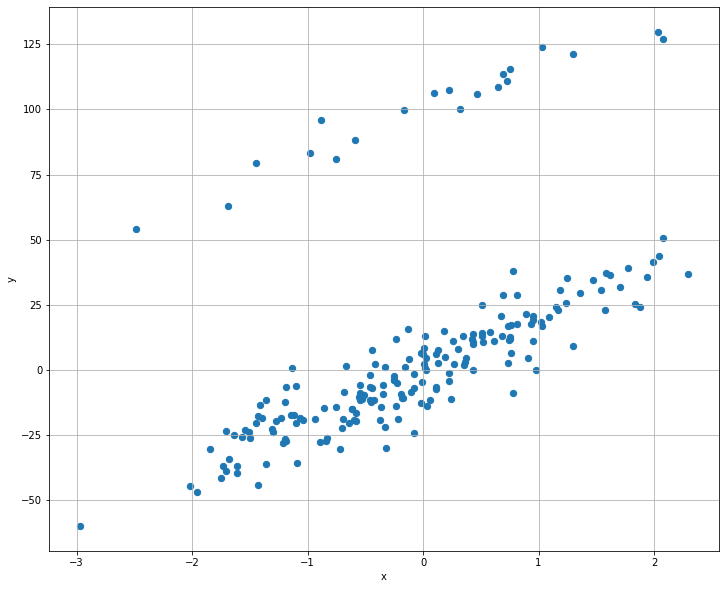

In [37]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(X[:, 0], Y[:], s=40)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

In [38]:
lr = LinearRegression()

In [39]:
lr.fit(X, Y)

LinearRegression()

In [40]:
x0r = -3
x1r = 2

y0r = lr.coef_[0] * x0 + lr.intercept_
y1r = lr.coef_[0] * x1 + lr.intercept_

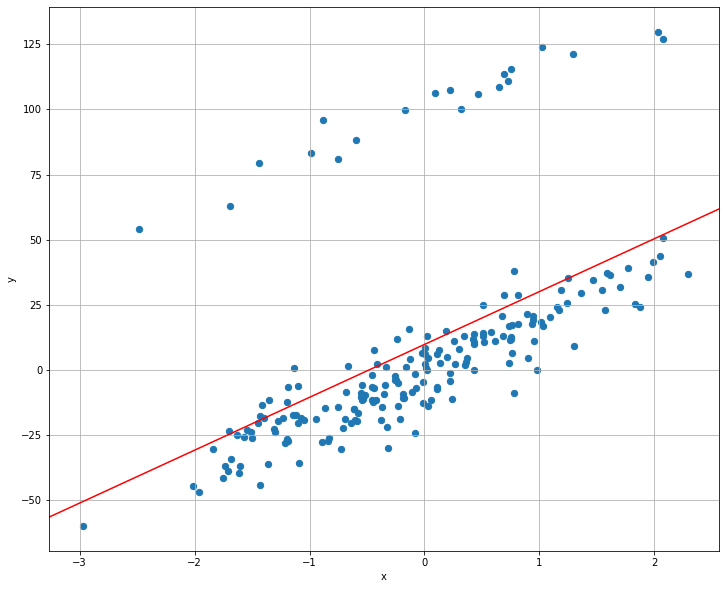

In [41]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(X[:, 0], Y[:], s=40)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axline((x0r, y0r), (x1r, y1r), c='red')

In [42]:
lr.score(X, Y)

0.30683355121395506

### Let's train a Huber regression model

In [43]:
from sklearn.linear_model import HuberRegressor

In [44]:
hr = HuberRegressor()

In [45]:
hr.fit(X, Y)

HuberRegressor()

In [46]:
x0r = -3
x1r = 2

y0r = hr.coef_[0] * x0 + hr.intercept_
y1r = hr.coef_[0] * x1 + hr.intercept_

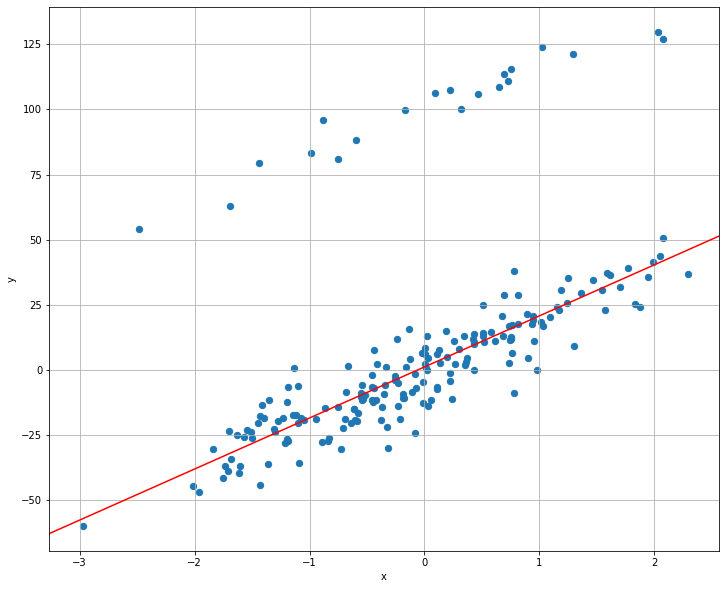

In [47]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.scatter(X[:, 0], Y[:], s=40)
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.axline((x0r, y0r), (x1r, y1r), c='red')